## Final Project Submission

Please fill out:
* Student name: **Joel Mott**
* Student pace: **self paced**
* Scheduled project review date/time: **Feb 6, 11am CST/12pm EST**
* Instructor name: **Abhineet Kulkarni**
* Blog post URL:https://medium.com/@joel.mott8/enhancing-and-narrowing-linear-regression-results-with-outside-data-5f0d22c67132


In [1]:
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
#Taking a preliminary look at the dataset: 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("C:\\Users\\joelm\\Desktop\\Flatiron School\\Phase 2\\Phase 2 Labs on GitHub\\dsc-phase-2-project-v2-3\\dsc-phase-2-project-v2-3\\data\\kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [5]:
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

Notes on columns: 'view' has five values - none, average, good, fair, excellent. 'grade' isn't the slope of the lot, but the quality of building materials - it includes poor, low, fair, low average, average, good, better, very good, excellent, luxury, and mansion.

Normally, I would proceed to my baseline model at this point. However, before I started, I had wanted to consider some ideas to take the model past the baseline by adding further variables besides the obvious square footage one. 

Keeping my stakeholder and their clients in mind, what'd be an interesting correlation with real-world business applications? Well, when people look for a home, what do they often want? The saying "location, location, location" comes to mind. I'm not sure how to find and rate desireable locations, since that's pretty subjective and may differ from one buyer to the next, but maybe I could look into school district scores. 

From there, I thought about other ways to tie existing or engineered predictors together into an overarching theme. An idea was to consider the things families with school-age children often look for in a home. Besides school districts, it looks like parents often consider the number of bedrooms, having "room to grow" (square footage), and I'll also consider the fact that they tend to buy a home and move during the summer (specifically, in June, July, and August). 

Looking at census data for King County, 55% of residents are either below 19 years of age or are between 25-44, which means they're at either at school age or at a time when they may be parents who are looking to buy a home in a good school district. In terms of sellers, residing in a good school district may be a reason to raise their sale price.

Below, "sds" represents a new file I created called "school_district_scores", which I made in Excel and will read in and merge with the main dataset below. I started this Excel spreadsheet with information from the King County Tax Assessor's office, where each school district in the county is listed: https://localscape.property/#kingcountyassessor/Education

From there, I went to each district's page on www.zipdatamaps.com and started making the Excel spreadsheet with the district name and the zip codes it encompasses. Next, I went to www.niche.com to gather school district "scores." Specifically, Niche gives districts "grade" scores from 1-12, which align with the following twelve possible scores: D-/D/D+/C-/C/C+/B-/B/B+/A-/A/A+.

While some zip codes only align with one school district, some are zoned for multiple districts. Rather than spend countless hours going through each of those multi-district zip code home records to ensure I specified it's exact district, I took the average district score for each district in that zip code. 

Now that I have a spreadsheet with zip codes and district scores, I converted it to a CSV file and merged it on the 'zipcode' column below:

In [6]:
sds = pd.read_csv("C:\\Users\\joelm\\Desktop\\Flatiron School\\Phase 2\\Phase 2 Labs on GitHub\\dsc-phase-2-project-v2-3\\dsc-phase-2-project-v2-3\\data\\kc_school_district_scores.csv")
sds

,zipcode,school_district_score
0,98001,8
1,98002,9
2,98003,7
3,98004,12
4,98005,12
...,...,...
88,98290,7
89,98296,10
90,98323,7
91,98354,7


In [7]:
#Making sure zip codes aren't missing:
df['zipcode'].isnull().values.any()

False

In [8]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [9]:
#Making sure I didn't duplicate any zip codes in my Excel/CSV school district scores file:
sds['zipcode'].value_counts()

98047    1
98101    1
98168    1
98158    1
98092    1
        ..
98011    1
98012    1
98272    1
98014    1
98177    1
Name: zipcode, Length: 93, dtype: int64

In [10]:
#Joining the new CSV with X_train:
df = df.merge(sds, how='inner', on='zipcode')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,school_district_score
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,8
1,4060000240,6/23/2014,205425.0,2,1.00,880,6780,1.0,NO,NONE,...,880,0.0,1945,0.0,98178,47.5009,-122.248,1190,6780,8
2,4058801670,7/17/2014,445000.0,3,2.25,2100,8201,1.0,NaN,AVERAGE,...,1620,480.0,1967,0.0,98178,47.5091,-122.244,2660,8712,8
3,2976800796,9/25/2014,236000.0,3,1.00,1300,5898,1.0,NaN,NONE,...,1300,0.0,1961,NaN,98178,47.5053,-122.255,1320,7619,8
4,6874200960,2/27/2015,170000.0,2,1.00,860,5265,1.0,NO,NONE,...,860,0.0,1931,0.0,98178,47.5048,-122.272,1650,8775,8


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     21597 non-null  int64  
 1   date                   21597 non-null  object 
 2   price                  21597 non-null  float64
 3   bedrooms               21597 non-null  int64  
 4   bathrooms              21597 non-null  float64
 5   sqft_living            21597 non-null  int64  
 6   sqft_lot               21597 non-null  int64  
 7   floors                 21597 non-null  float64
 8   waterfront             19221 non-null  object 
 9   view                   21534 non-null  object 
 10  condition              21597 non-null  object 
 11  grade                  21597 non-null  object 
 12  sqft_above             21597 non-null  int64  
 13  sqft_basement          21597 non-null  object 
 14  yr_built               21597 non-null  int64  
 15  yr

Now that the district scores have been added into the provided DataFrame, let's perform a train-test-split before any variable transformations occur:

In [12]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df)

In [13]:
y = df[['price']]
X = df.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
X_train

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,school_district_score
6405,5454000010,12/10/2014,3,1.75,2020,9478,1.0,NO,NONE,Good,...,2020,0.0,1961,0.0,98040,47.5383,-122.238,3050,15594,12
937,9265880170,8/26/2014,4,2.50,2470,5954,2.0,NaN,NONE,Average,...,2470,0.0,2013,0.0,98028,47.7685,-122.236,2470,4800,12
19076,4151800470,8/20/2014,3,2.00,1010,5973,1.0,NO,NONE,Very Good,...,1010,0.0,1942,0.0,98033,47.6652,-122.202,1920,6015,12
15201,9272201704,5/12/2014,2,2.50,980,895,2.0,NO,NONE,Average,...,670,310.0,2009,0.0,98116,47.5874,-122.386,980,899,10
13083,7151700190,3/31/2015,2,1.50,2210,5000,1.0,NO,AVERAGE,Average,...,1530,680.0,1951,0.0,98122,47.6122,-122.288,2700,5000,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,7459810210,10/2/2014,4,2.25,2050,26000,2.0,NO,NONE,Good,...,2050,0.0,1977,0.0,98042,47.3423,-122.063,2330,31100,9
21575,3835502815,9/25/2014,3,2.50,3110,9930,1.0,NO,FAIR,Average,...,1640,1470.0,1954,0.0,98039,47.6112,-122.226,3650,14399,12
5390,5693500760,7/7/2014,3,1.00,1890,3330,1.5,NO,NONE,Good,...,1390,500.0,1901,0.0,98103,47.6597,-122.352,1530,3330,10
860,3579000410,9/5/2014,3,2.25,2010,7447,2.0,NO,NONE,Average,...,2010,0.0,1985,0.0,98028,47.7470,-122.248,2230,7846,12


In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 6405 to 15795
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     16197 non-null  int64  
 1   date                   16197 non-null  object 
 2   bedrooms               16197 non-null  int64  
 3   bathrooms              16197 non-null  float64
 4   sqft_living            16197 non-null  int64  
 5   sqft_lot               16197 non-null  int64  
 6   floors                 16197 non-null  float64
 7   waterfront             14410 non-null  object 
 8   view                   16151 non-null  object 
 9   condition              16197 non-null  object 
 10  grade                  16197 non-null  object 
 11  sqft_above             16197 non-null  int64  
 12  sqft_basement          16197 non-null  object 
 13  yr_built               16197 non-null  int64  
 14  yr_renovated           13307 non-null  float64
 15 

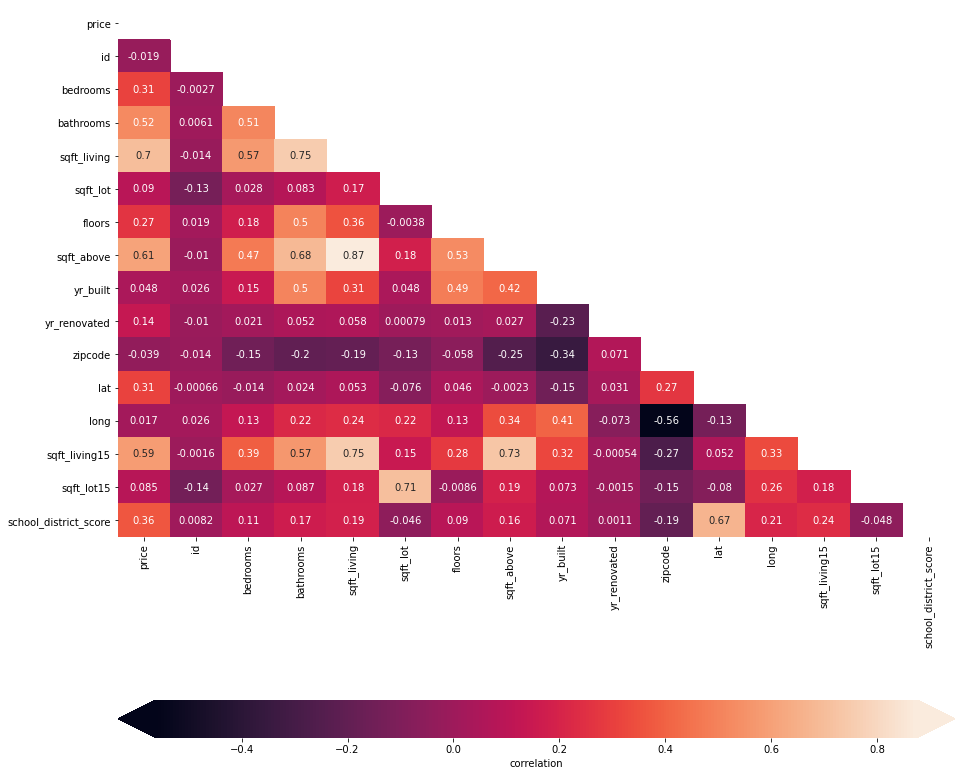

In [16]:
#Now let's combine X_train with y_train so we can see the correlation heatmap
# for all of our training data:
training_data = pd.concat([y_train, X_train], axis=1)
training_data

import seaborn as sns
heatmap_data = training_data
corr = heatmap_data.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data=corr, mask=np.triu(corr), ax=ax, annot=True, 
            cbar_kws={'label':'correlation', 'orientation':'horizontal', 'pad':.2, 'extend':'both'});

It looks like 'sqft_living', aka the square footage of the living space in the home, is by far the most highly-correlated predictor for sale price. Let's take a closer look:

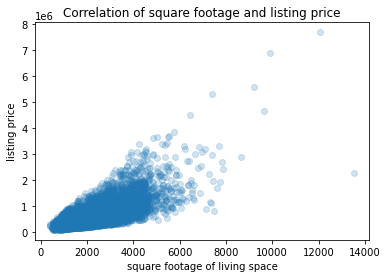

In [17]:
fig, ax = plt.subplots()
ax.scatter(X_train['sqft_living'], y_train, alpha=0.2)
ax.set_xlabel('square footage of living space')
ax.set_ylabel('listing price')
ax.set_title('Correlation of square footage and listing price');

There's definitely a strong positive correlation there, although it looks like the distribution of one or both isn't entirely normal. However, for purposes of our baseline model, this will serve as a good benchmark against which to compare future model iterations.

In [18]:
y_train.isnull().values.any()

False

In [19]:
X_train['sqft_living'].isnull().values.any()

False

In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
formula = 'price ~ sqft_living'
model = ols(formula=formula, data=training_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 1.571e+04
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        10:24:08   Log-Likelihood:            -2.2463e+05
No. Observations:               16197   AIC:                         4.493e+05
Df Residuals:                   16195   BIC:                         4.493e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.311e+04   4980.254     -6.649      0.000   -4.29e+04   -2.34e+04
sqft_living   274.6815      2.192    125.331      0.000     270.386     278.977
==============================================================================
Omnibus:                    10707.172   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           374442.228
Skew:                           2.681   Prob(JB):                         0.00
Kurtosis:                      25.936   Cond. No.                     5.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
from sklearn.linear_model import LinearRegression
baseline_model = LinearRegression()

In [22]:
from sklearn.model_selection import cross_validate, ShuffleSplit

most_correlated_feature = np.array(X_train['sqft_living']).reshape(-1,1)
y_train_cv = np.array(y_train).reshape(-1,1)

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=42)
baseline_scores = cross_validate(
                estimator=baseline_model,
                X=most_correlated_feature,
                y=y_train_cv,
                return_train_score=True,
                cv=splitter)
print('train score:', baseline_scores['train_score'].mean())
print('test score:', baseline_scores['test_score'].mean())

train score: 0.49237215871023315
test score: 0.4911998522614051


Unsurprisingly, we see a decent R-squared score. The condition number is quite high, although that isn't *too* big a concern when we're just working with one predictor. Nonetheless, as we iterate through more refined models, we'll want to lower that condition number. 

Looking at our intra-training-data cross-validation scores, the "test score" is comprable to the "train score" (even a little higher), so we're off to a good start with this baseline. 

Moving towards building a more sophisticated model, our previous heatmap showed a 0.36 correlation between price and school district scores, the fourth-highest among all fifteen predictors. Let's look at the extent to which this pattern visually emerges:

In [23]:
X_train['school_district_score'].isnull().values.any()

False

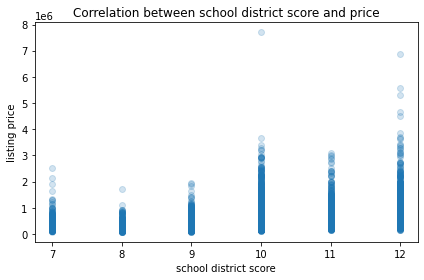

In [24]:
fig, ax = plt.subplots()
ax.scatter(X_train['school_district_score'], y_train, alpha=0.2)
ax.set_xlabel('school district score')
ax.set_ylabel('listing price')
ax.set_title('Correlation between school district score and price')
plt.tight_layout();

It looks like there's a general rise in the range of prices (both in terms of range-width and price) as the score of the school district increases. Let's construct our first model iteration here:

In [25]:
#Refit the model:
formula = 'price ~ school_district_score'
model = ols(formula=formula, data=training_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     2480.
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        10:24:10   Log-Likelihood:            -2.2897e+05
No. Observations:               16197   AIC:                         4.579e+05
Df Residuals:                   16195   BIC:                         4.580e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -3.5e+05    1.8e+04    -19.418      0.000   -3.85e+05   -3.15e+05
school_district_score  8.899e+04   1786.756     49.804      0.000    8.55e+04    9.25e+04
==============================================================================
Omnibus:                    14802.934   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1107845.335
Skew:                           4.150   Prob(JB):                         0.00
Kurtosis:                      42.657   Cond. No.                         70.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
new_predictor = np.array(X_train['school_district_score']).reshape(-1,1)
y_train_cv = np.array(y_train).reshape(-1,1)

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=42)
baseline_scores = cross_validate(
                estimator=baseline_model,
                X=new_predictor,
                y=y_train_cv,
                return_train_score=True,
                cv=splitter)
print('train score:', baseline_scores['train_score'].mean())
print('test score:', baseline_scores['test_score'].mean())

train score: 0.13371856557960468
test score: 0.1307075888080913


The bad news is the R-sqaured value is quite lower than that of the baseline model, but the good news is the condition number is now reasonable and our cross-validation train & test scores are pretty close. 

This lower R-squared score is also not *too* surprising: we know square footage is a much stronger predictor. However, our stakeholder is likely already well aware of that. **Perhaps I can bring insight to some less well-known phenomena when it comes to buyer preference and factors that go into a seller's ability to raise their price.** 

To that end, let's see what more we can do to get a clearer picture of what school district scores bring to the table. Let's examine how each incremental increase in school district scores improves price. We can do so by splitting school_district_score into each score I found (7-12) via dummy variables. 

Granted, these scores aren't inherently ripe for dummy variables; we can already see the numerical rise in score in X_train. However, dummy variables can still give us a clearer picture of just how each score aligns with price differences.

In [27]:
school_dist_score_dummies = pd.get_dummies(X_train['school_district_score'], prefix='sds', drop_first=True)
X_train = X_train.drop('school_district_score', axis=1)
X_train = pd.concat([X_train, school_dist_score_dummies], axis=1)
X_train

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,sds_8,sds_9,sds_10,sds_11,sds_12
6405,5454000010,12/10/2014,3,1.75,2020,9478,1.0,NO,NONE,Good,...,98040,47.5383,-122.238,3050,15594,0,0,0,0,1
937,9265880170,8/26/2014,4,2.50,2470,5954,2.0,NaN,NONE,Average,...,98028,47.7685,-122.236,2470,4800,0,0,0,0,1
19076,4151800470,8/20/2014,3,2.00,1010,5973,1.0,NO,NONE,Very Good,...,98033,47.6652,-122.202,1920,6015,0,0,0,0,1
15201,9272201704,5/12/2014,2,2.50,980,895,2.0,NO,NONE,Average,...,98116,47.5874,-122.386,980,899,0,0,1,0,0
13083,7151700190,3/31/2015,2,1.50,2210,5000,1.0,NO,AVERAGE,Average,...,98122,47.6122,-122.288,2700,5000,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,7459810210,10/2/2014,4,2.25,2050,26000,2.0,NO,NONE,Good,...,98042,47.3423,-122.063,2330,31100,0,1,0,0,0
21575,3835502815,9/25/2014,3,2.50,3110,9930,1.0,NO,FAIR,Average,...,98039,47.6112,-122.226,3650,14399,0,0,0,0,1
5390,5693500760,7/7/2014,3,1.00,1890,3330,1.5,NO,NONE,Good,...,98103,47.6597,-122.352,1530,3330,0,0,1,0,0
860,3579000410,9/5/2014,3,2.25,2010,7447,2.0,NO,NONE,Average,...,98028,47.7470,-122.248,2230,7846,0,0,0,0,1


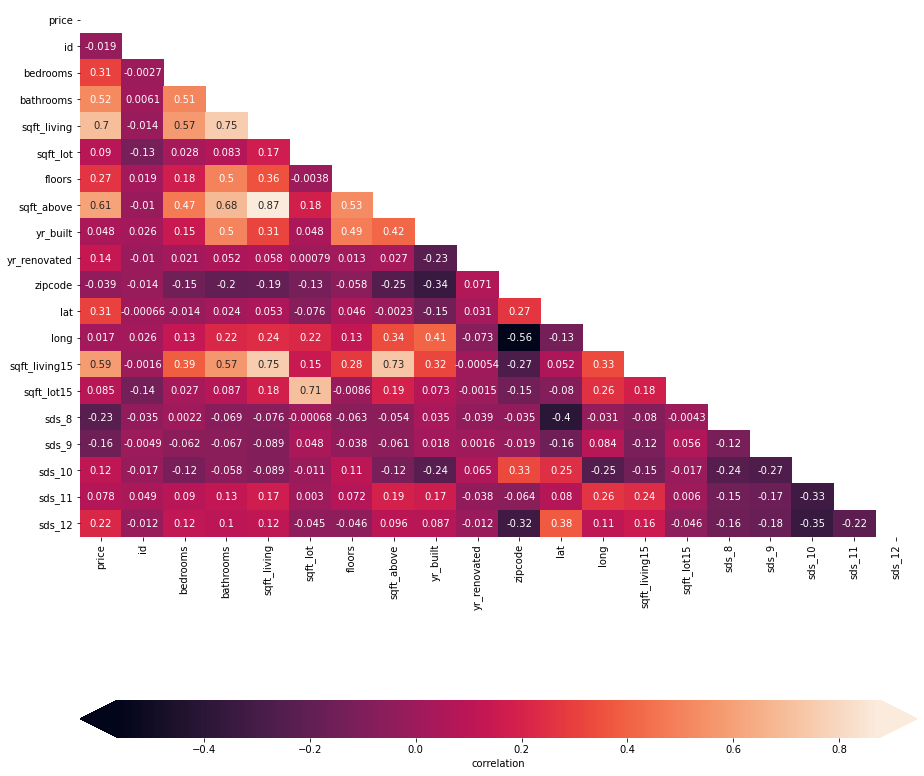

In [28]:
#Re-combine the revised X_train with y_train so we can see the heatmap with 'price':
training_data = pd.concat([y_train, X_train], axis=1)
training_data

heatmap_data = training_data
corr = heatmap_data.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data=corr, mask=np.triu(corr), ax=ax, annot=True, 
            cbar_kws={'label':'correlation', 'orientation':'horizontal', 'pad':.2, 'extend':'both'});

In [29]:
#Refitting the model now that we have multiple predictors with our dummy variables:
sds_predictors = X_train[['sds_8', 'sds_9','sds_10', 'sds_11', 'sds_12']]
import statsmodels.api as sm
predictors = sm.add_constant(sds_predictors)
predictors.head()

,const,sds_8,sds_9,sds_10,sds_11,sds_12
6405,1.0,0,0,0,0,1
937,1.0,0,0,0,0,1
19076,1.0,0,0,0,0,1
15201,1.0,0,0,1,0,0
13083,1.0,0,0,1,0,0


In [30]:
model = sm.OLS(y_train, predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     580.3
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        10:24:19   Log-Likelihood:            -2.2879e+05
No. Observations:               16197   AIC:                         4.576e+05
Df Residuals:                   16191   BIC:                         4.576e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.187e+05   9187.772     34.688      0.000    3.01e+05    3.37e+05
sds_8      -2.426e+04   1.23e+04     -1.968      0.049   -4.84e+04    -100.530
sds_9       6.348e+04   1.18e+04      5.374      0.000    4.03e+04    8.66e+04
sds_10      2.771e+05   1.02e+04     27.178      0.000    2.57e+05    2.97e+05
sds_11      2.815e+05   1.12e+04     25.235      0.000     2.6e+05    3.03e+05
sds_12       3.83e+05    1.1e+04     34.908      0.000    3.61e+05    4.04e+05
==============================================================================
Omnibus:                    14975.031   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1178690.495
Skew:                           4.213   Prob(JB):                         0.00
Kurtosis:                      43.933   Cond. No.                         9.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
predictors = np.array(predictors).reshape(-1,6)
y_train_cv = np.array(y_train).reshape(-1,1)

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=42)
baseline_scores = cross_validate(
                estimator=baseline_model,
                X=predictors,
                y=y_train_cv,
                return_train_score=True,
                cv=splitter)
print('train score:', baseline_scores['train_score'].mean())
print('test score:', baseline_scores['test_score'].mean())

train score: 0.1527755364843322
test score: 0.15015524120036328


We only see a meager increase in the R-squared score even though we're getting more refined coefficients when it comes to each step up between school district scores. 

Also, the standard errors have increased to around ten thousand dollars, but in the big picture of home prices, that isn't too bad. The p-values are all pretty good as well, with the exception of 'sds_8', which is right on the cusp of the standard alpha threshold of 0.05. 

Also, the condition number fell quite a bit, so multicollinearity probably isn't an issue, but I think that's a bit of a truism based on the nature of the predictors in this model. It's also good to see the train & test cross-validation scores are still close.

Looking at my predictors of interest in the school district rankings, while all the correlations are not *particularly* strong, they are almost entirely consistent and they span zero. In other words, the lower-scoring districs negatively correlate with price while the higher-scoring ones incrementally show a rising, positive correlation. 

What's also noteworthy is that nothing is more negatively correlated with price than the two lowest-scoring school districts. Additionally, after all the square footage/room and latitude predictors, the next-highest correlation would be the highest-ranking school districts.

Let's continue carefully adding predictors to our model. Let's see the extent to which the bedroom count and overall square footage influence this model.

Now let's check whether 'sqft_living' shows a normal distribution:

In [32]:
from scipy.stats import skew
skewness = skew(X_train['sqft_living'])
print("skew of X_train's 'sqft_living':", skewness)

skew of X_train's 'sqft_living': 1.4956470762604674


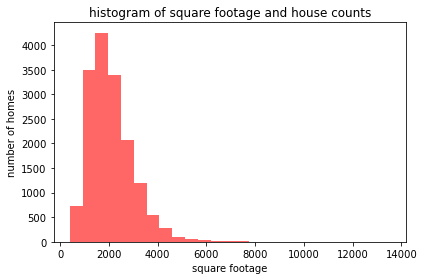

In [33]:
fig, ax = plt.subplots()

ax.hist(X_train['sqft_living'], bins=25, color='r', alpha=0.6)
ax.set_title('histogram of square footage and house counts')
ax.set_xlabel('square footage')
ax.set_ylabel('number of homes')
plt.tight_layout()
plt.savefig('histogram of square footage and house counts.jpg');

It looks like this column's distribution is skewed, so a logarithmic transformation would be helpful:

In [34]:
X_train['sqft_living_log'] = np.log(X_train['sqft_living'])
#X_train.rename(columns = {'sqft_living': 'sqft_living_log'}, inplace = True)

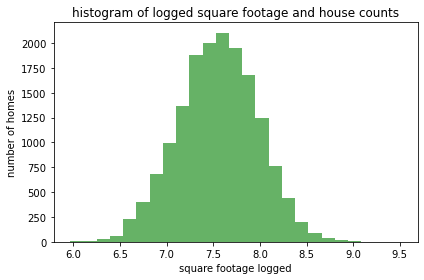

In [35]:
fig, ax = plt.subplots()

ax.hist(X_train['sqft_living_log'], bins=25, color='g', alpha=0.6)
ax.set_title('histogram of logged square footage and house counts')
ax.set_xlabel('square footage logged')
ax.set_ylabel('number of homes')
plt.tight_layout()
plt.savefig('histogram of logged square footage and house counts.jpg');

In [36]:
skewness = skew(X_train['sqft_living_log'])
print("skew of X_train's 'sqft_living_log':", skewness)

skew of X_train's 'sqft_living_log': -0.026733420175554485


Now that our predictors are looking more managable and/or normally distributed, let's recombine them to our predictor list:

In [37]:
#predictors = X_train[['sds_8', 'sds_9', 'sds_10', 'sds_11', 'sds_12',\
#                      'bdrm_3', 'bdrm_4', 'bdrm_5', 'bdrm_6', 'bdrm_7',\
#                      'bdrm_8', 'bdrm_9', 'bdrm_10', 'sqft_living_log']]
#predictors = X_train[['sds_8', 'sds_9', 'sds_10', 'sds_11', 'sds_12',\
#                      'bdrm_3', 'bdrm_4', 'bdrm_5', 'bdrm_6', 'bdrm_7',\
#                      'bdrm_8', 'bdrm_9', 'bdrm_10', 'sqft_living']]
predictors = X_train[['sds_8', 'sds_9', 'sds_10', 'sds_11', 'sds_12', 'bedrooms', 'sqft_living_log']]
predictors = sm.add_constant(predictors)
predictors.head()

,const,sds_8,sds_9,sds_10,sds_11,sds_12,bedrooms,sqft_living_log
6405,1.0,0,0,0,0,1,3,7.610853
937,1.0,0,0,0,0,1,4,7.811973
19076,1.0,0,0,0,0,1,3,6.917706
15201,1.0,0,0,1,0,0,2,6.887553
13083,1.0,0,0,1,0,0,2,7.700748


In [38]:
model = sm.OLS(y_train, predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     2155.
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        10:24:23   Log-Likelihood:            -2.2479e+05
No. Observations:               16197   AIC:                         4.496e+05
Df Residuals:                   16189   BIC:                         4.497e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -3.647e+06    4.2e+04    -86.725      0.000   -3.73e+06   -3.56e+06
sds_8           -1.749e+04   9633.176     -1.815      0.069   -3.64e+04    1395.061
sds_9            8.169e+04   9231.684      8.849      0.000    6.36e+04    9.98e+04
sds_10           2.631e+05   7973.889     32.999      0.000    2.47e+05    2.79e+05
sds_11           1.626e+05   8794.470     18.494      0.000    1.45e+05     1.8e+05
sds_12           2.915e+05   8620.634     33.810      0.000    2.75e+05    3.08e+05
bedrooms        -3.602e+04   2776.314    -12.976      0.000   -4.15e+04   -3.06e+04
sqft_living_log  5.464e+05   6200.999     88.112      0.000    5.34e+05    5.59e+05
==============================================================================
Omnibus:                    15971.330   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2151606.294
Skew:                           4.492   Prob(JB):                         0.00
Kurtosis:                      58.745   Cond. No.                         176.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
#predictors = np.array(predictors).reshape(-1,15)
#y_train_cv = np.array(y_train).reshape(-1,1)

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=42)
baseline_scores = cross_validate(
                estimator=baseline_model,
                X=predictors,
                y=y_train,
                return_train_score=True,
                cv=splitter)
print('train score:', baseline_scores['train_score'].mean())
print('test score:', baseline_scores['test_score'].mean())

train score: 0.48400059971188386
test score: 0.4792475653337674


Definitely an improvement in terms of the R-squared score while also maintaining a low condition number. 

Now we'll engineer a new feature from the non-numerical 'date' variable that indicates whether the house sale took place when families are most likely to move (in June, July, or August): 

In [40]:
X_train['date'].dtype

dtype('O')

In [41]:
from datetime import datetime
X_train['date'] = pd.to_datetime(X_train['date'])
X_train['date'] = pd.DatetimeIndex(X_train['date']).month
X_train.rename(columns = {'date': 'month_of_sale'}, inplace = True)

In [42]:
X_train['summer_purchase'] = np.where((X_train['month_of_sale'] > 5) & (X_train['month_of_sale'] < 9), 1, 0)
X_train['summer_purchase']

6405     0
937      1
19076    1
15201    0
13083    0
        ..
11964    0
21575    0
5390     1
860      0
15795    1
Name: summer_purchase, Length: 16197, dtype: int32

In [43]:
predictors = X_train[['sds_8', 'sds_9', 'sds_10', 'sds_11', 'sds_12',\
                      'bedrooms', 'sqft_living_log', 'summer_purchase']]
predictors = sm.add_constant(predictors)
#predictors = np.array(final_X_test_predictors).reshape(-1,9)
predictors

,const,sds_8,sds_9,sds_10,sds_11,sds_12,bedrooms,sqft_living_log,summer_purchase
6405,1.0,0,0,0,0,1,3,7.610853,0
937,1.0,0,0,0,0,1,4,7.811973,1
19076,1.0,0,0,0,0,1,3,6.917706,1
15201,1.0,0,0,1,0,0,2,6.887553,0
13083,1.0,0,0,1,0,0,2,7.700748,0
...,...,...,...,...,...,...,...,...,...
11964,1.0,0,1,0,0,0,4,7.625595,0
21575,1.0,0,0,0,0,1,3,8.042378,0
5390,1.0,0,0,1,0,0,3,7.544332,1
860,1.0,0,0,0,0,1,3,7.605890,0


In [44]:
model = sm.OLS(y_train, predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     1887.
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        10:24:24   Log-Likelihood:            -2.2479e+05
No. Observations:               16197   AIC:                         4.496e+05
Df Residuals:                   16188   BIC:                         4.497e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -3.646e+06    4.2e+04    -86.719      0.000   -3.73e+06   -3.56e+06
sds_8           -1.757e+04   9632.404     -1.824      0.068   -3.65e+04    1310.129
sds_9            8.183e+04   9231.123      8.865      0.000    6.37e+04    9.99e+04
sds_10           2.631e+05   7973.220     32.995      0.000    2.47e+05    2.79e+05
sds_11           1.627e+05   8793.815     18.506      0.000    1.46e+05     1.8e+05
sds_12           2.917e+05   8620.585     33.835      0.000    2.75e+05    3.09e+05
bedrooms        -3.611e+04   2776.422    -13.007      0.000   -4.16e+04   -3.07e+04
sqft_living_log  5.467e+05   6202.409     88.141      0.000    5.35e+05    5.59e+05
summer_purchase -8780.0594   4442.061     -1.977      0.048   -1.75e+04     -73.129
==============================================================================
Omnibus:                    15967.109   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2149513.943
Skew:                           4.490   Prob(JB):                         0.00
Kurtosis:                      58.717   Cond. No.                         176.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=42)
baseline_scores = cross_validate(
                estimator=baseline_model,
                X=predictors,
                y=y_train,
                return_train_score=True,
                cv=splitter)
print('train score:', baseline_scores['train_score'].mean())
print('test score:', baseline_scores['test_score'].mean())

train score: 0.4842380398496306
test score: 0.47893617413723905


On one hand, we see that considering whether a home is purchased during the summer shows basically no effect on listing price. On the other hand, this information may prove useful; families with school-age children don't necessarily need to put in a higher offer in order to purchase a home during the summer months.

In any case, our model's predictors share an overarching theme of family-friendly considerations, but the R-squared score isn't compelling. 

In [46]:
final_model = LinearRegression()
final_model.fit(y_train, predictors)

LinearRegression()

Alright, we have a final model with an R-squared score only 0.009 smaller than our baseline with a somewhat reasonable condition number. We can now support our arguement to our stakeholders about common considerations families with school-age children consider when buying a home: school districts given an A-, A, or A+ score, alongside the number of bedrooms and overall square footage, are correlated with higher sale prices. Sellers may want to consider raising their listing price if they reside in a school district with a Niche.com score higher than 9. Buyers don't necessarily need to worry about bidding too high during the summer months. 

Once we evaluate our model's performance against the test data (X_test/y_yest), we'll be able to narrow down more specific price adjustment consideration to our stakeholder.

In [47]:
school_dist_score_dummies_X_test = pd.get_dummies(X_test['school_district_score'], prefix='sds', drop_first=True)
X_test = X_test.drop('school_district_score', axis=1)
X_test = pd.concat([X_test, school_dist_score_dummies_X_test], axis=1)
X_test

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,sds_8,sds_9,sds_10,sds_11,sds_12
3686,8024201370,12/8/2014,2,1.00,880,5111,1.0,NO,NONE,Average,...,98115,47.6997,-122.314,1370,5111,0,0,1,0,0
10247,6073300040,1/6/2015,4,2.25,2020,12500,2.0,NO,NONE,Fair,...,98056,47.5403,-122.175,1800,13175,0,0,0,1,0
4037,431500155,10/24/2014,5,1.75,2020,6565,1.0,NO,NONE,Average,...,98115,47.6821,-122.283,2020,6552,0,0,1,0,0
3437,7237450110,7/1/2014,4,2.50,2530,5048,2.0,NO,NONE,Average,...,98038,47.3559,-122.063,2530,4359,0,0,1,0,0
19291,3982700250,4/23/2015,4,2.50,3030,7800,2.0,NO,NONE,Average,...,98033,47.6890,-122.196,2840,7435,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18276,1672000170,9/8/2014,3,1.75,1890,11141,1.0,NO,NONE,Good,...,98006,47.5697,-122.163,2720,11144,0,0,0,1,0
15003,148000680,10/27/2014,3,1.75,1660,4800,1.0,NO,NONE,Average,...,98116,47.5734,-122.412,1510,4800,0,0,1,0,0
13478,7133300380,2/9/2015,4,2.50,2500,4000,2.0,NO,NONE,Average,...,98144,47.5902,-122.311,1480,4300,0,0,1,0,0
18399,9346920260,6/4/2014,4,2.25,2500,8500,1.0,NaN,NONE,Good,...,98006,47.5615,-122.131,2290,8927,0,0,0,1,0


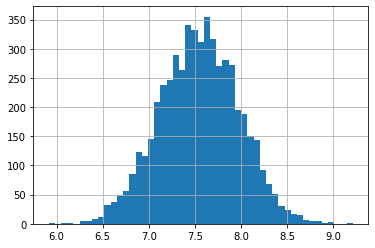

In [48]:
X_test['sqft_living_log'] = np.log(X_test['sqft_living'])
#X_test.rename(columns = {'sqft_living': 'sqft_living_log'}, inplace = True)
X_test['sqft_living_log'].hist(bins='auto');

Now I'll check to see whether there's a correlation between listing price and the summer season, when parents ar emor elikely to purchase a home:

In [49]:
X_test['date'] = pd.to_datetime(X_test['date'])
X_test['date'] = pd.DatetimeIndex(X_test['date']).month
X_test.rename(columns = {'date': 'month_of_sale'}, inplace = True)

In [50]:
X_test['summer_purchase'] = np.where((X_test['month_of_sale'] > 5) & (X_test['month_of_sale'] < 9), 1, 0)
X_test['summer_purchase']

3686     0
10247    0
4037     0
3437     1
19291    0
        ..
18276    0
15003    0
13478    0
18399    1
2358     1
Name: summer_purchase, Length: 5400, dtype: int32

In [51]:
final_X_test_predictors = X_test[['sds_8', 'sds_9', 'sds_10', 'sds_11', 'sds_12',\
                                  'bedrooms', 'sqft_living_log', 'summer_purchase']]
final_X_test_predictors = sm.add_constant(final_X_test_predictors)
final_X_test_predictors = np.array(final_X_test_predictors).reshape(-1,9)
final_X_test_predictors

array([[1.        , 0.        , 0.        , ..., 2.        , 6.77992191,
        0.        ],
       [1.        , 0.        , 0.        , ..., 4.        , 7.61085279,
        0.        ],
       [1.        , 0.        , 0.        , ..., 5.        , 7.61085279,
        0.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 4.        , 7.82404601,
        0.        ],
       [1.        , 0.        , 0.        , ..., 4.        , 7.82404601,
        1.        ],
       [1.        , 0.        , 0.        , ..., 4.        , 7.89357207,
        1.        ]])

In [52]:
final_X_test_predictors.shape

(5400, 9)

In [53]:
#y_test = np.array(y_test).reshape(-1,1)
y_test.shape

(5400, 1)

In [54]:
final_model.fit(final_X_test_predictors, y_test)

LinearRegression()

In [55]:
final_model.score(final_X_test_predictors, y_test)

0.4647234209757929

In [56]:
y_hat = final_model.predict(final_X_test_predictors)
y_hat

array([[235783.96488584],
       [531375.46466871],
       [569499.56446258],
       ...,
       [749730.29127112],
       [656885.74524259],
       [532251.7073725 ]])

In [57]:
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=42)
baseline_scores = cross_validate(
                estimator=final_model,
                X=final_X_test_predictors,
#               y=final_y_test,
                y=y_test,
                return_train_score=True,
                cv=splitter)
print('train score:', baseline_scores['train_score'].mean())
print('test score:', baseline_scores['test_score'].mean())

train score: 0.46378786445788694
test score: 0.466518791547609


Good news, it looks like our model performs closely between the training and the test data. Let's verify some more information on our model's performance:

In [58]:
y_hat = final_model.predict(final_X_test_predictors)

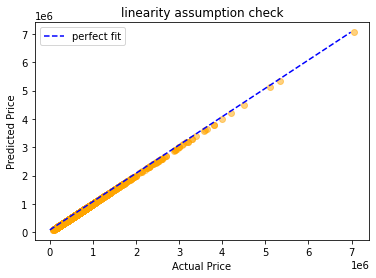

In [59]:
fig, ax = plt.subplots()

perfect_line = np.arange(y_test['price'].min(), y_test['price'].max())
ax.plot(perfect_line, linestyle="--", color="blue", label="perfect fit")
ax.scatter(y_test, y_test, color="orange", alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.set_title("linearity assumption check")
ax.legend();

In [60]:
#training data predictors
lm_train_predictions = final_model.predict(predictors)
#test data predictors
lm_test_predictions = final_model.predict(final_X_test_predictors)

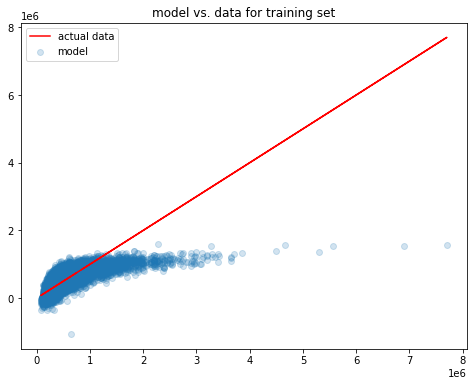

In [61]:
plt.figure(figsize=(8,6))
plt.scatter(y_train, lm_train_predictions, alpha=0.2, label="model")
plt.plot(y_train, y_train, color='r', label="actual data")
plt.title("model vs. data for training set")
plt.legend();

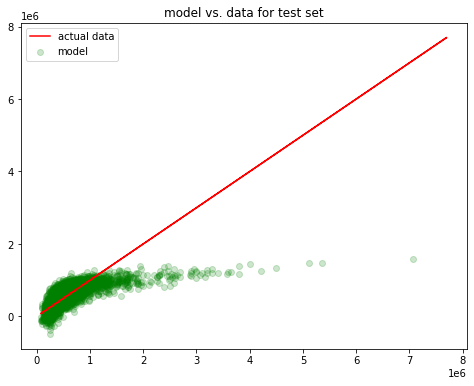

In [62]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, lm_test_predictions, color='g', alpha=0.2, label="model")
plt.plot(y_train, y_train, color='r', label="actual data")
plt.title("model vs. data for test set")
plt.legend();

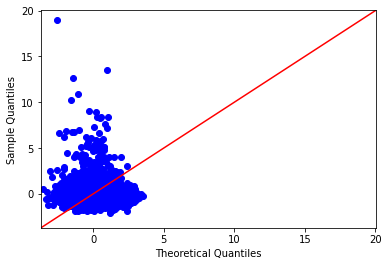

In [63]:
import scipy.stats as stats
#residuals = (final_y_test_unlogged - lm_test_predictions_unlogged)
residuals = (y_test - lm_test_predictions)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show();

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
pd.Series(vif, index=predictors.columns, name="Variance Inflation Factor")

const              431.140904
sds_8                2.026845
sds_9                2.225134
sds_10               3.500057
sds_11               2.633790
sds_12               2.754872
bedrooms             1.629374
sqft_living_log      1.676344
summer_purchase      1.001566
Name: Variance Inflation Factor, dtype: float64

Well, those don't look good. Based on what I found online, I think this looks like the target variable isn't normally distributed. Let's apply a logarithmic transformation:

In [65]:
skewness = skew(y_train)
print("skew of y_train, aka 'price':", skewness)

skew of y_train, aka 'price': [3.82104252]


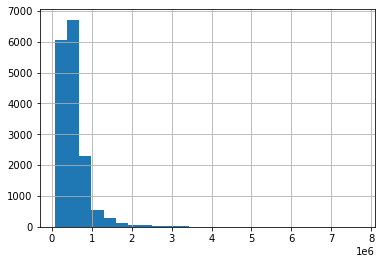

In [66]:
y_train['price'].hist(bins=25);

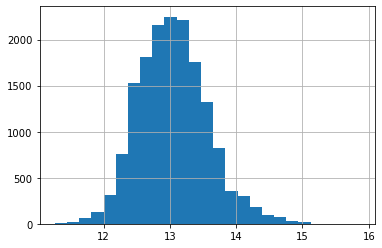

In [67]:
y_train['price_log'] = np.log(y_train['price'])
y_train['price_log'].hist(bins=25);

In [68]:
model = sm.OLS(y_train['price_log'], predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     3889.
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        10:24:48   Log-Likelihood:                -3866.0
No. Observations:               16197   AIC:                             7750.
Df Residuals:                   16188   BIC:                             7819.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.4026      0.050    127.708      0.000       6.304       6.501
sds_8              -0.0377      0.011     -3.283      0.001      -0.060      -0.015
sds_9               0.1985      0.011     18.030      0.000       0.177       0.220
sds_10              0.5745      0.010     60.429      0.000       0.556       0.593
sds_11              0.4278      0.010     40.797      0.000       0.407       0.448
sds_12              0.5945      0.010     57.837      0.000       0.574       0.615
bedrooms           -0.0517      0.003    -15.618      0.000      -0.058      -0.045
sqft_living_log     0.8501      0.007    114.942      0.000       0.836       0.865
summer_purchase    -0.0067      0.005     -1.261      0.207      -0.017       0.004
==============================================================================
Omnibus:                      286.959   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              440.252
Skew:                           0.188   Prob(JB):                     2.52e-96
Kurtosis:                       3.715   Cond. No.                         176.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=42)
baseline_scores = cross_validate(
                estimator=baseline_model,
                X=predictors,
                y=y_train['price_log'],
                return_train_score=True,
                cv=splitter)
print('train score:', baseline_scores['train_score'].mean())
print('test score:', baseline_scores['test_score'].mean())

train score: 0.6562643687307659
test score: 0.6617333515575389


This looks like a better overall model now and a good place to consider it the final model. Let's apply the same transformations to X_test and see how it looks:

In [70]:
y_test['price_log'] = np.log(y_test['price'])

In [71]:
final_model.fit(final_X_test_predictors, y_test['price_log'])

LinearRegression()

In [72]:
final_model.score(final_X_test_predictors, y_test['price_log'])

0.6661315268186173

In [73]:
final_model_OLS = sm.OLS(y_test['price_log'], final_X_test_predictors).fit()
final_model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     1345.
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        10:24:49   Log-Likelihood:                -1279.9
No. Observations:                5400   AIC:                             2578.
Df Residuals:                    5391   BIC:                             2637.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3302      0.087     72.832      0.000       6.160       6.501
x1            -0.0483      0.019     -2.480      0.013      -0.087      -0.010
x2             0.1809      0.019      9.583      0.000       0.144       0.218
x3             0.5582      0.016     34.505      0.000       0.526       0.590
x4             0.4196      0.018     23.539      0.000       0.385       0.455
x5             0.6047      0.018     34.496      0.000       0.570       0.639
x6            -0.0668      0.006    -11.200      0.000      -0.078      -0.055
x7             0.8692      0.013     67.357      0.000       0.844       0.895
x8            -0.0109      0.009     -1.181      0.238      -0.029       0.007
==============================================================================
Omnibus:                      140.655   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              242.955
Skew:                           0.222   Prob(JB):                     1.75e-53
Kurtosis:                       3.939   Cond. No.                         176.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
y_hat = final_model.predict(final_X_test_predictors)
y_hat

array([12.64805644, 13.09819483, 13.16998758, ..., 13.42207709,
       13.27256705, 12.91341989])

In [76]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test['price_log'], final_model.predict(final_X_test_predictors), squared=False)

0.3066921234957257

Great! Now let's check for the regression assumptions like linearity and normality:

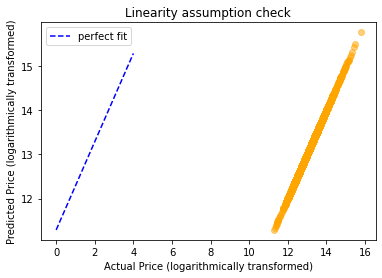

In [77]:
y_test_logged = y_test['price_log']
fig, ax = plt.subplots()

perfect_line = np.arange(y_test_logged.min(), y_test_logged.max())
ax.plot(perfect_line, linestyle="--", color="blue", label="perfect fit")
ax.scatter(y_test_logged, y_test_logged, color="orange", alpha=0.5)
ax.set_xlabel("Actual Price (logarithmically transformed)")
ax.set_ylabel("Predicted Price (logarithmically transformed)")
ax.set_title("Linearity assumption check")
ax.legend();

In [78]:
y_test_logged.min(), y_test_logged.max()

(11.289781913656018, 15.769955609469426)

I think the reason these two lines have the same slope but different intercepts probably deals with having logarithmically transformed our target variable. However, if the purpose of this graph is to show whether the data is meeting the linear assumption, I would say this is satisfactory. 

Now let's check for normailty and homoscedasticity:

In [79]:
#training data predictors
lm_train_predictions = final_model.predict(predictors)
#test data predictors
lm_test_predictions = final_model.predict(final_X_test_predictors)

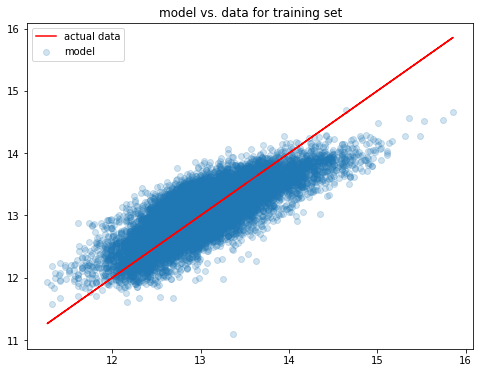

In [80]:
y_train_logged = y_train['price_log']

plt.figure(figsize=(8,6))
plt.scatter(y_train_logged, lm_train_predictions, alpha=0.2, label="model")
plt.plot(y_train_logged, y_train_logged, color='r', label="actual data")
plt.title("model vs. data for training set")
plt.legend();

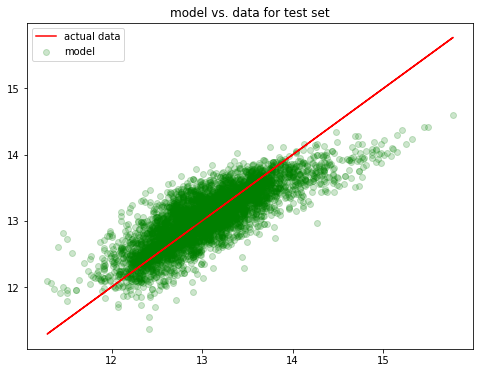

In [81]:
plt.figure(figsize=(8,6))
plt.scatter(y_test_logged, lm_test_predictions, color='g', alpha=0.2, label="model")
plt.plot(y_test_logged, y_test_logged, color='r', label="actual data")
plt.title("model vs. data for test set")
plt.legend();

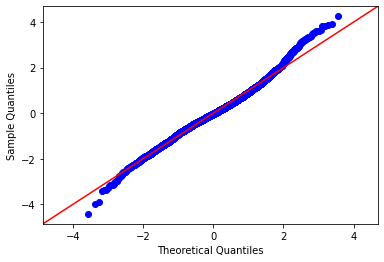

In [82]:
residuals = (y_test_logged - lm_test_predictions)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show();

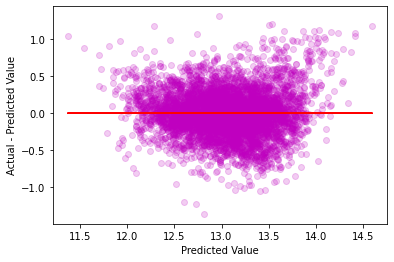

In [83]:
fig, ax = plt.subplots()

ax.scatter(lm_test_predictions, residuals, color='m', alpha=0.2)
ax.plot(lm_test_predictions, [0 for i in range(len(X_test))], color='r')
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

It looks like having logarithmically transformed our target variable improved our model's performance in regard to the R-squared score, RSME, and abiding by the assumptions of linear regression. Let's see if I can "un-log" the logged variables (price & square footage) in order to obtain more meaningful coefficients:

In [84]:
#First we isolate the coefficients from the final_model:
final_model_coef = final_model.coef_ #index=final_X_test_predictors.columns, name="Coefficients")
final_model_coef

array([ 0.        , -0.04832207,  0.18093672,  0.55815081,  0.41958072,
        0.60471489, -0.06677734,  0.8692217 , -0.01093996])

In [85]:
final_model_coef_df = pd.DataFrame(final_model_coef)

In [86]:
#Now we pass an operation to "unlog" them, turning them into percentage changes instead except for 
# 'sqft_living_log' because it's already logged, so it already shows the percentage change:
final_model_unlogged_showing_percentages_instead = final_model_coef_df.apply(lambda \
                                                    x: (np.exp(x)-1)*100 \
                                                    if x.index is x < 7 | x.index >= 8 else x)   
final_model_unlogged_showing_percentages_instead

,0
0,0.000000
1,-0.048322
2,0.180937
3,0.558151
4,0.419581
5,0.604715
6,-0.066777
7,0.869222
8,-0.010940


In [87]:
index = ['constant', 'sds_8', 'sds_9', 'sds_10', 'sds_11', 'sds_12',\
        'bedrooms', 'sqft_living_log', 'summer_purchase']

final_model_unlogged_showing_percentages_instead.index =  list(index)
final_model_unlogged_showing_percentages_instead

,0
constant,0.000000
sds_8,-0.048322
sds_9,0.180937
sds_10,0.558151
sds_11,0.419581
sds_12,0.604715
bedrooms,-0.066777
sqft_living_log,0.869222
summer_purchase,-0.010940


In [88]:
LRresult = (model.summary().tables[1])
LRresult

,coef,std err,t,P>|t|,[0.025,0.975]
const,6.4026,0.050,127.708,0.000,6.304,6.501
sds_8,-0.0377,0.011,-3.283,0.001,-0.060,-0.015
sds_9,0.1985,0.011,18.030,0.000,0.177,0.220
sds_10,0.5745,0.010,60.429,0.000,0.556,0.593
sds_11,0.4278,0.010,40.797,0.000,0.407,0.448
sds_12,0.5945,0.010,57.837,0.000,0.574,0.615
bedrooms,-0.0517,0.003,-15.618,0.000,-0.058,-0.045
sqft_living_log,0.8501,0.007,114.942,0.000,0.836,0.865
summer_purchase,-0.0067,0.005,-1.261,0.207,-0.017,0.004


In [89]:
index = ['', 'constant', 'sds_8', 'sds_9', 'sds_10', 'sds_11', 'sds_12',\
        'bedrooms', 'sqft_living_log', 'summer_purchase']
ols_summary = pd.DataFrame(LRresult, 
                           index=index, 
                           columns = ['variable_name', 'coef', 'standard error', \
                                      't-value', 'P>|t|', '[0.025', '0.975]'])
ols_summary

,variable_name,coef,standard error,t-value,P>|t|,[0.025,0.975]
,,coef,std err,t,P>|t|,[0.025,0.975]
constant,const,6.4026,0.050,127.708,0.000,6.304,6.501
sds_8,sds_8,-0.0377,0.011,-3.283,0.001,-0.060,-0.015
sds_9,sds_9,0.1985,0.011,18.030,0.000,0.177,0.220
sds_10,sds_10,0.5745,0.010,60.429,0.000,0.556,0.593
sds_11,sds_11,0.4278,0.010,40.797,0.000,0.407,0.448
sds_12,sds_12,0.5945,0.010,57.837,0.000,0.574,0.615
bedrooms,bedrooms,-0.0517,0.003,-15.618,0.000,-0.058,-0.045
sqft_living_log,sqft_living_log,0.8501,0.007,114.942,0.000,0.836,0.865
summer_purchase,summer_purchase,-0.0067,0.005,-1.261,0.207,-0.017,0.004


In [90]:
final_model_results = pd.concat([final_model_unlogged_showing_percentages_instead, ols_summary], axis=1)
final_model_results = final_model_results.drop(['variable_name', 'coef'], axis=1)
final_model_results = final_model_results.drop(final_model_results.tail(1).index)
final_model_results = final_model_results.rename(columns={0: 'coefficient as %'})
final_model_results

,coefficient as %,standard error,t-value,P>|t|,[0.025,0.975]
constant,0.000000,0.050,127.708,0.000,6.304,6.501
sds_8,-0.048322,0.011,-3.283,0.001,-0.060,-0.015
sds_9,0.180937,0.011,18.030,0.000,0.177,0.220
sds_10,0.558151,0.010,60.429,0.000,0.556,0.593
sds_11,0.419581,0.010,40.797,0.000,0.407,0.448
sds_12,0.604715,0.010,57.837,0.000,0.574,0.615
bedrooms,-0.066777,0.003,-15.618,0.000,-0.058,-0.045
sqft_living_log,0.869222,0.007,114.942,0.000,0.836,0.865
summer_purchase,-0.010940,0.005,-1.261,0.207,-0.017,0.004


In summary, this final model takes into account factors that atter to families with school age children, such as school districts, number of bedrooms, square footage, and the time of year families tend to move. The school district scores were seperated out, giving each district "grade" its own category using one-hot encoding. In order to avoid issues of multicollinearity, the first category ('sds_7') was dropped and considered the reference category. Subsequently, sds_8 through sds_12 show price percentage change from that reference sds_7. 

We see that, moving up from a district grade of 7, sds_8 has a negligible effect on price, while sds_9 through sds_12 show larger impacts on listing price. Interestingly, sds_10 shows a higher price increase than 11, but this may be due to the fact that there are more homes in school districts with a 10 grade score. 

It turns out that, despite what I often saw when searching for family home-buying priorities, the number of bedrooms didn't have too signficiant an impact on price. What's more is that price tended to *decrease* with more bedrooms. This may be due to the fact that King County spans urban, suburban, and rural areas and smaller homes in Seattle may sell for much more than larger homes further from the city. 

As we learned from our correlation heatmap earlier, no other single predictor increases listing price as much as square footage. While our stakeholder is almost certainly already well aware of this, the model can help inform them that each percentage increase in square footage correlates with a 0.86% increase in listing price, giving them more specific pricing recommendations to seller and buyers considering bids.

Finally, while most families with school-age children move during the summer months when school isn't in session, they wouldn't have to worry about factoring that in to their bids; summer shows almost no correlation to listing price. 

Each of these correlations show a p-value less than the standard 0.05 alpha level. The model also has a reasonable condition number that shows multicollinearity and distributions of variables are not too big a concern. While the R-sqaured value of 0.666 isn't remarkably high, the tradeoff is more specific insight into a subgroup of buyers.

In terms of our stakeholder, they could use this information to help advise seller clients on what to factor in when deciding on a listing price. While not every buyer is weighing options with kids in mind, those residing in higher-scoring school districts may want to consider raising their listing price accordingly. Buyers with kids can be informed on how much more to expect per school district score when it comes to placing a successful bid on a home. Ultimately, our stakeholder would be equipped on specific percentages from familial predictors to advise clients on both the selling and buying side of real estate.